In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno

In [ ]:
%%writefile sample.csv
x1,x2,x3,x4,x5
,a,0.1,철수,2022-11-24
,b,0.2,영희,
3,c,0.3,,2022-11-26
4,d,0.4,은희,2022-11-27
5,,0.5,지우,2022-11-28
6,f,0.6,이슬,2022-11-29

Writing sample.csv


In [ ]:
df = pd.read_csv('sample.csv')
df

,x1,x2,x3,x4,x5
0,NaN,a,0.1,철수,2022-11-24
1,NaN,b,0.2,영희,NaN
2,3.0,c,0.3,NaN,2022-11-26
3,4.0,d,0.4,은희,2022-11-27
4,5.0,NaN,0.5,지우,2022-11-28
5,6.0,f,0.6,이슬,2022-11-29


In [ ]:
df.isnull()

,x1,x2,x3,x4,x5
0,True,False,False,False,False
1,True,False,False,False,True
2,False,False,False,True,False
3,False,False,False,False,False
4,False,True,False,False,False
5,False,False,False,False,False


In [ ]:
df.isnull().sum()

x1    2
x2    1
x3    0
x4    1
x5    1
dtype: int64

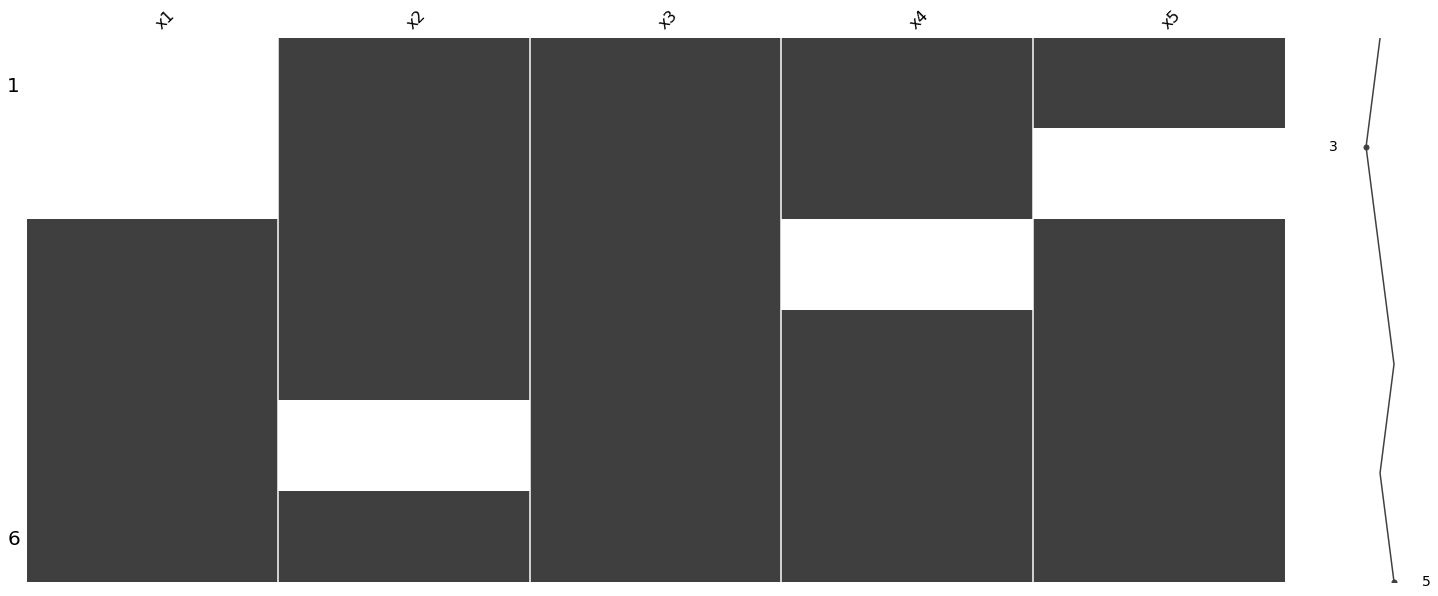

In [ ]:
msno.matrix(df)
plt.show()

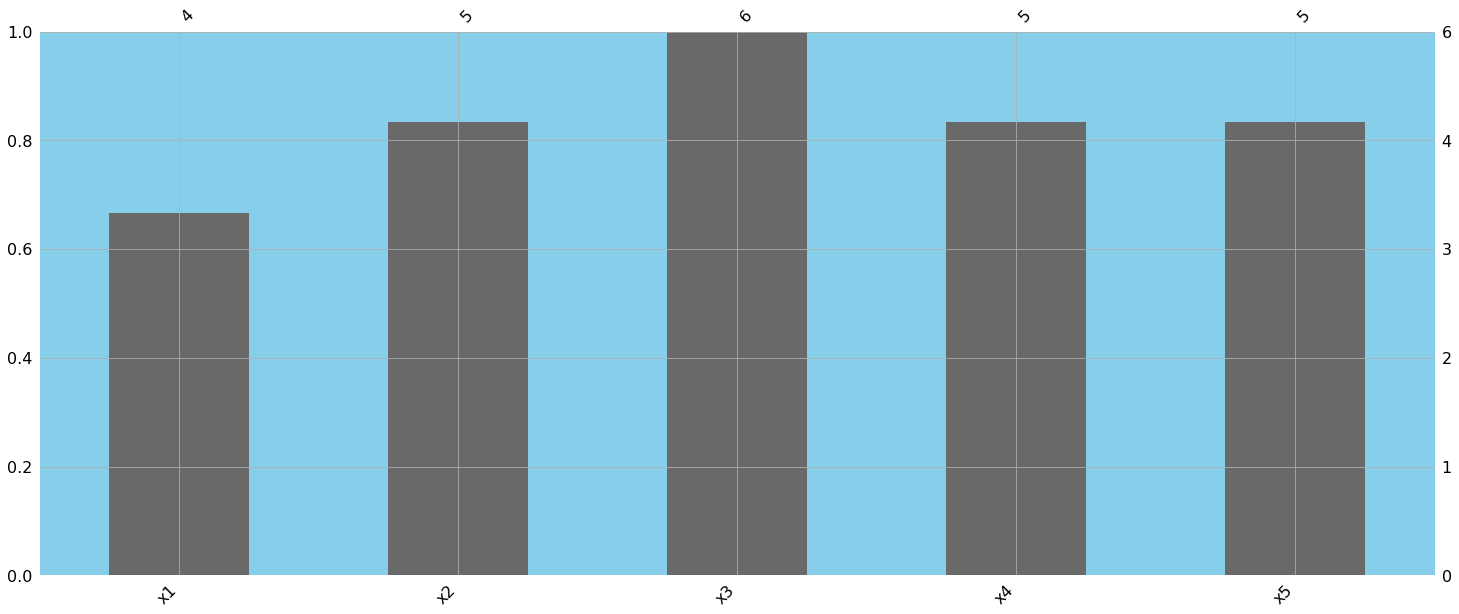

In [ ]:
ax = msno.bar(df)
ax.patch.set_facecolor('skyblue')
ax.grid()
plt.show()

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


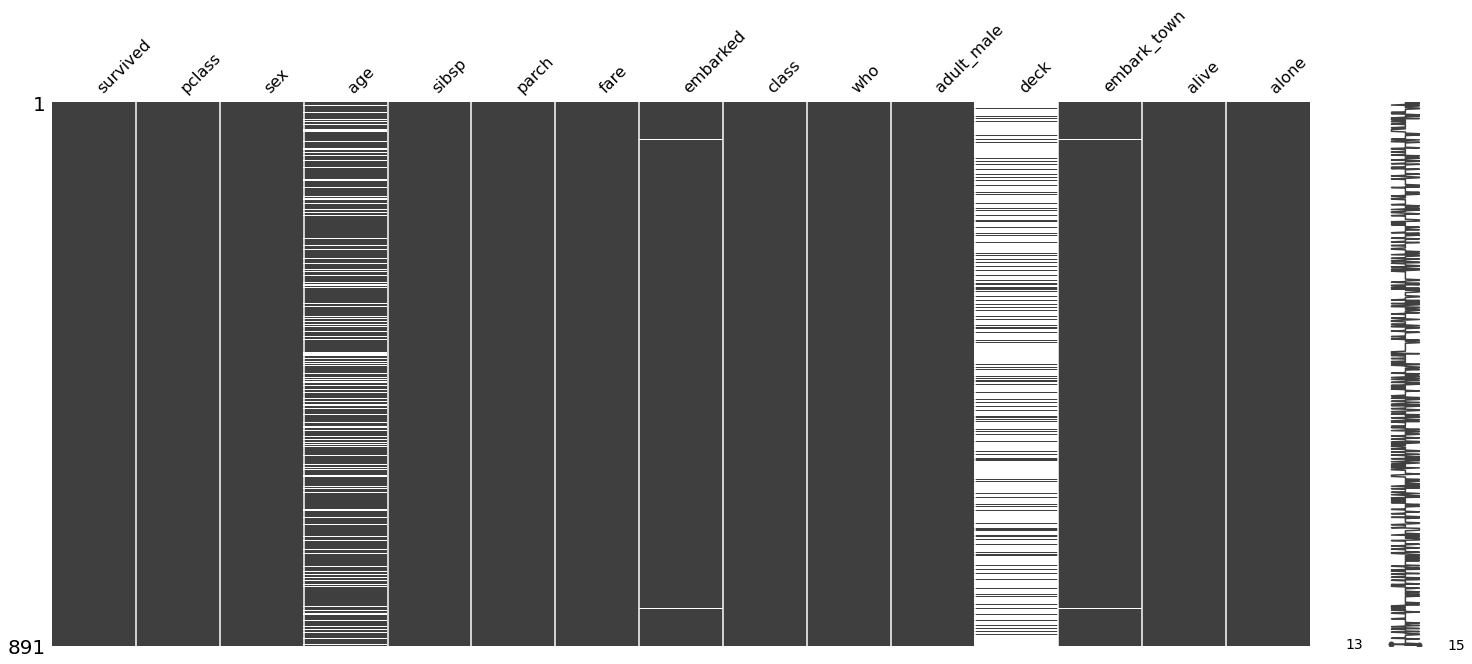

In [ ]:
msno.matrix(titanic)
plt.show()

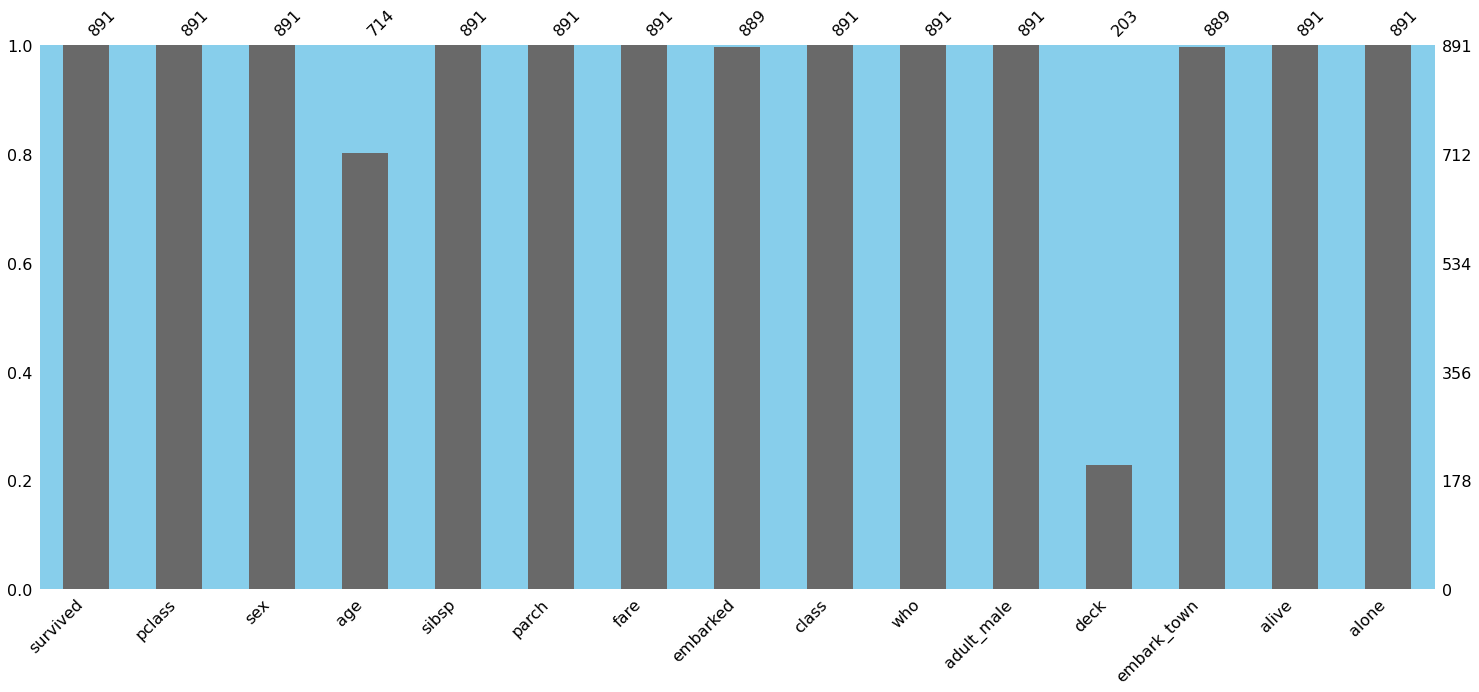

In [ ]:
ax = msno.bar(titanic)
ax.patch.set_facecolor('skyblue')
plt.show()

In [ ]:
df.dropna()

,x1,x2,x3,x4,x5
3,4.0,d,0.4,은희,2022-11-27
5,6.0,f,0.6,이슬,2022-11-29


In [ ]:
df

,x1,x2,x3,x4,x5
0,NaN,a,0.1,철수,2022-11-24
1,NaN,b,0.2,영희,NaN
2,3.0,c,0.3,NaN,2022-11-26
3,4.0,d,0.4,은희,2022-11-27
4,5.0,NaN,0.5,지우,2022-11-28
5,6.0,f,0.6,이슬,2022-11-29


In [ ]:
df.dropna(axis=1)

,x3
0,0.1
1,0.2
2,0.3
3,0.4
4,0.5
5,0.6


In [ ]:
df.dropna(thresh=4)

,x1,x2,x3,x4,x5
0,NaN,a,0.1,철수,2022-11-24
2,3.0,c,0.3,NaN,2022-11-26
3,4.0,d,0.4,은희,2022-11-27
4,5.0,NaN,0.5,지우,2022-11-28
5,6.0,f,0.6,이슬,2022-11-29


In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
len(titanic)

891

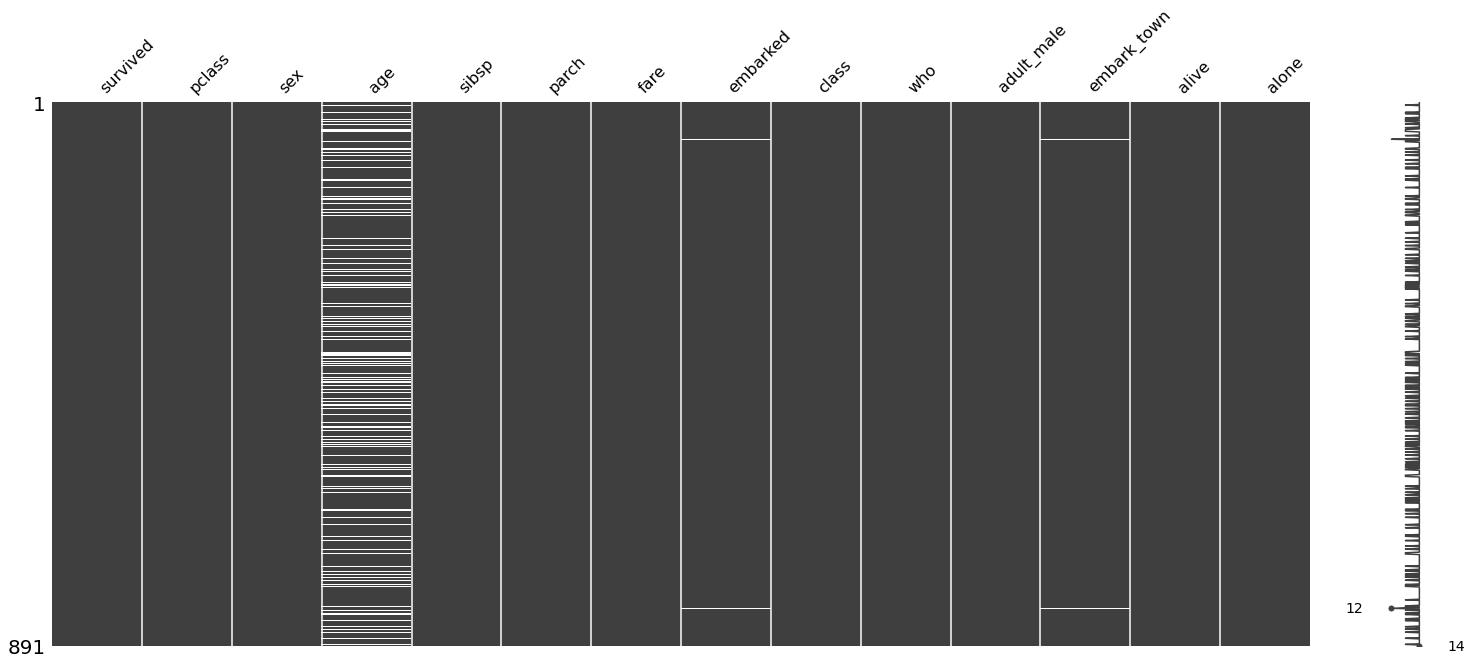

In [ ]:
titanic = titanic.dropna(thresh=int(len(titanic)*0.5), axis=1)
msno.matrix(titanic)
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
'''
strategy 종류
mean : 평균
median : 중앙값
most_frequent : 최빈값
'''
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,x1,x2,x3,x4,x5
0,3.0,a,0.1,철수,2022-11-24
1,3.0,b,0.2,영희,2022-11-24
2,3.0,c,0.3,영희,2022-11-26
3,4.0,d,0.4,은희,2022-11-27
4,5.0,a,0.5,지우,2022-11-28
5,6.0,f,0.6,이슬,2022-11-29


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0, flags=flags)


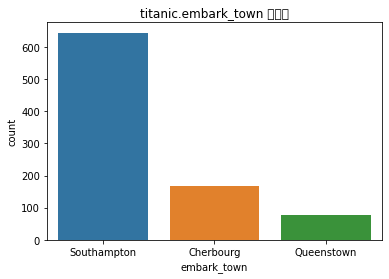

In [ ]:
sns.countplot(titanic.embark_town)
plt.title('titanic.embark_town 데이터')
plt.show()

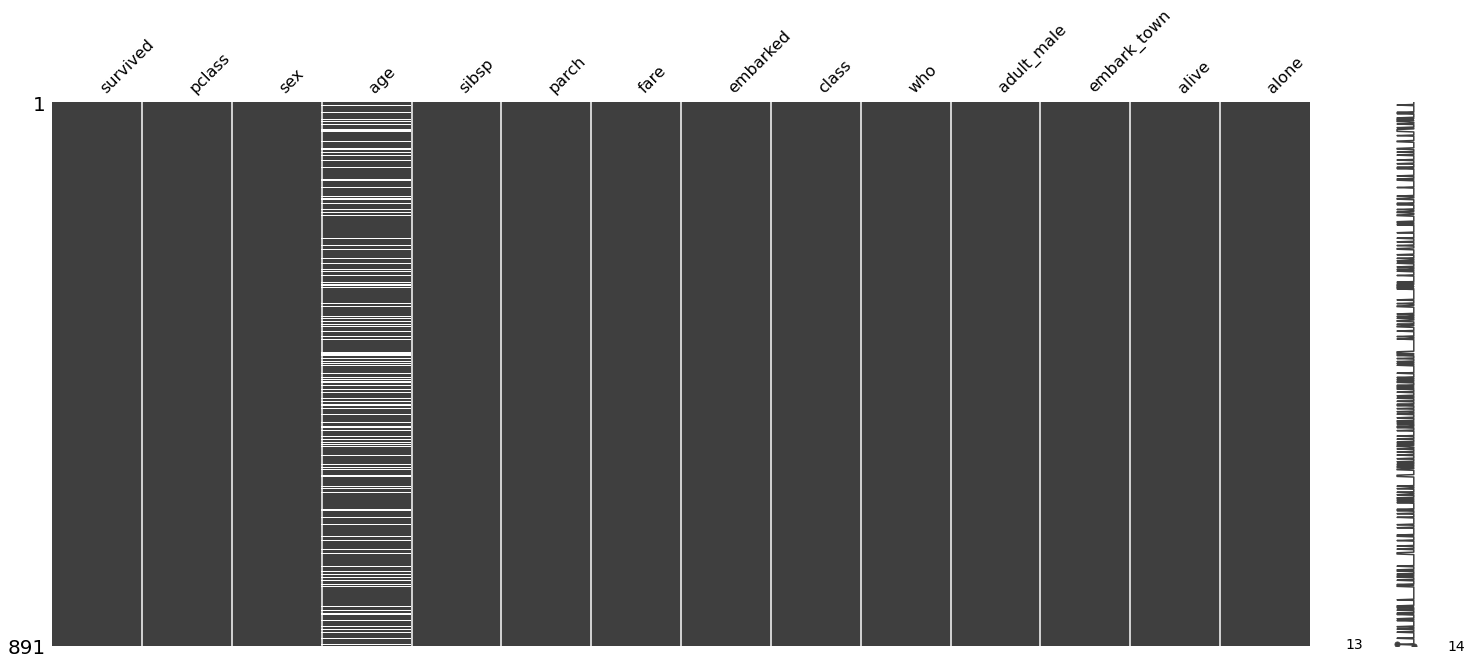

In [ ]:
imputer_embark_town = SimpleImputer(strategy='most_frequent')
titanic['embark_town'] = imputer_embark_town.fit_transform(titanic[['embark_town']])
titanic['embarked'] = imputer_embark_town.fit_transform(titanic[['embarked']])

msno.matrix(titanic)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_te

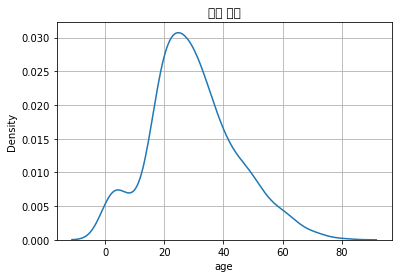

In [ ]:
sns.kdeplot(titanic.age)
plt.title('나이 분포')
plt.grid()
plt.show()

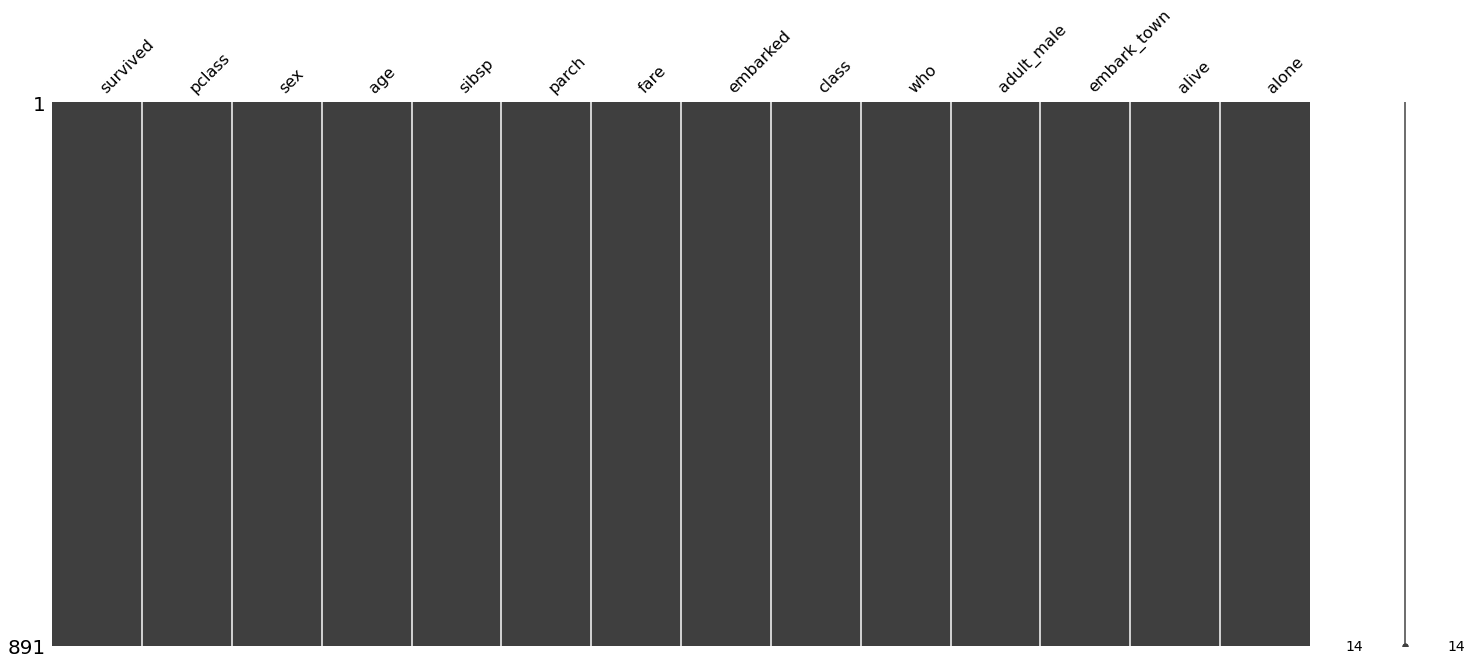

In [ ]:
imputer_age = SimpleImputer(strategy='median')
titanic['age'] = imputer_age.fit_transform(titanic[['age']])

msno.matrix(titanic)
plt.show()

In [ ]:
titanic['none_string'] = titanic['embark_town']

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,none_string
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Southampton


In [ ]:
titanic['none_string'][40:50] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


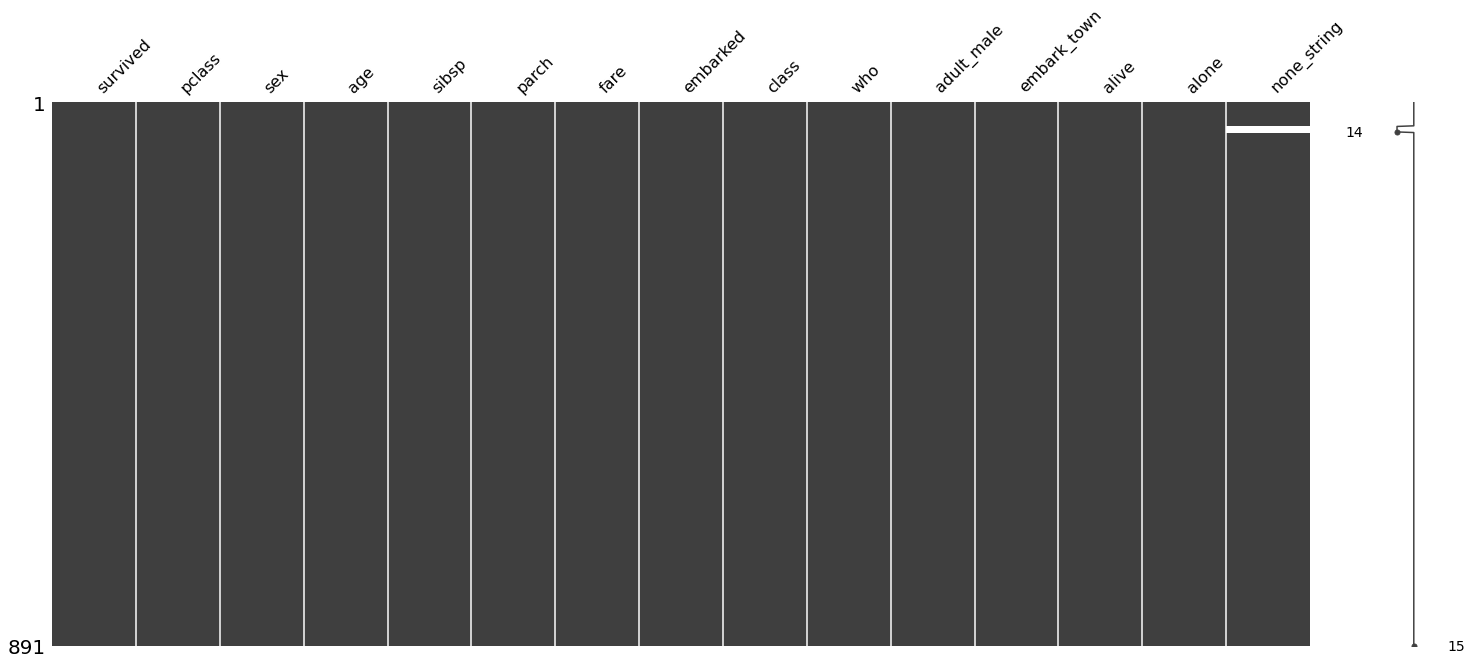

In [ ]:
msno.matrix(titanic)

In [ ]:
# 범주형 데이터의 경우 mean이나 median을 구할 수 없다.
# imputer_none_string = SimpleImputer(strategy='mean')
# titanic['none_string'] = imputer_none_string.fit_transform(titanic[['none_string']])

patsy를 통한 데이터 프레임을 다뤄봅시다.

In [ ]:
from patsy import demo_data
df = pd.DataFrame(demo_data('x1','x2','x3','x4','x5'))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [ ]:
from patsy import dmatrix
dmatrix('x1 + 0', data=df)

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

In [ ]:
dmatrix('x1 + x2 + x3 +0', data=df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [ ]:
dmatrix('x1 + np.log(np.abs(x2))', data=df)

DesignMatrix with shape (5, 3)
  Intercept       x1  np.log(np.abs(x2))
          1  1.76405            -0.02298
          1  0.40016            -0.05120
          1  0.97874            -1.88811
          1  2.24089            -2.27090
          1  1.86756            -0.89014
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(np.abs(x2))' (column 2)

In [ ]:
def five_times(x):
  return 5*x

a = lambda x: 5*x

dmatrix('a(x1)',data=df)

DesignMatrix with shape (5, 2)
  Intercept     a(x1)
          1   8.82026
          1   2.00079
          1   4.89369
          1  11.20447
          1   9.33779
  Terms:
    'Intercept' (column 0)
    'a(x1)' (column 1)

In [ ]:
dmatrix('x1 + x2 + x1:x2 + 0', data=df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [ ]:
dmatrix('x1 + x2 + x3+x4 + 0', data=df)

DesignMatrix with shape (5, 4)
       x1        x2       x3        x4
  1.76405  -0.97728  0.14404   0.33367
  0.40016   0.95009  1.45427   1.49408
  0.97874  -0.15136  0.76104  -0.20516
  2.24089  -0.10322  0.12168   0.31307
  1.86756   0.41060  0.44386  -0.85410
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)
    'x4' (column 3)

In [ ]:
dmatrix('x1 + center(x1)+0',data=df)

DesignMatrix with shape (5, 2)
       x1  center(x1)
  1.76405     0.31377
  0.40016    -1.05012
  0.97874    -0.47154
  2.24089     0.79061
  1.86756     0.41728
  Terms:
    'x1' (column 0)
    'center(x1)' (column 1)

In [ ]:
'''
center : 평균을 0으로 만들어 준다.
standardize : 평균을 0으로 하고 표준편차를 1로 스케일
'''
dmatrix('x1 + standardize(x1)', data=df)

DesignMatrix with shape (5, 3)
  Intercept       x1  standardize(x1)
          1  1.76405          0.47060
          1  0.40016         -1.57500
          1  0.97874         -0.70723
          1  2.24089          1.18578
          1  1.86756          0.62584
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'standardize(x1)' (column 2)

In [ ]:
xs = dmatrix('standardize(x1)', data=df)

In [ ]:
xs.design_info.factor_infos

{EvalFactor('standardize(x1)'): FactorInfo(factor=EvalFactor('standardize(x1)'),
            type='numerical',
            state=<factor state>,
            num_columns=1)}

sklearn을 통해 데이터를 표준화 및 정규화를 진행해봅시다.

In [ ]:
X = np.arange(7).reshape(-1,1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [ ]:
X2 = np.vstack([X, [[10000]]])
X2

array([[    0],
       [    1],
       [    2],
       [    3],
       [    4],
       [    5],
       [    6],
       [10000]])

In [ ]:
scaler.fit_transform(X2)

array([[-0.3788718 ],
       [-0.37856934],
       [-0.37826687],
       [-0.37796441],
       [-0.37766195],
       [-0.37735949],
       [-0.37705703],
       [ 2.64575089]])

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(X2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.85614286e+03]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit_transform(X)

array([[  0.,   0.,   0.],
       [  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.],
       [  6.,  36., 216.]])

In [ ]:
from sklearn.preprocessing import FunctionTransformer

X = 90*np.arange(9).reshape(-1, 1)
# X

In [ ]:
def sincos(X):
  x0 = np.sin(X*np.pi/180)
  x1 = np.cos(X*np.pi/180)
  X_new = np.hstack([x0, x1])
  return X_new

X2 = FunctionTransformer(sincos).fit_transform(X)


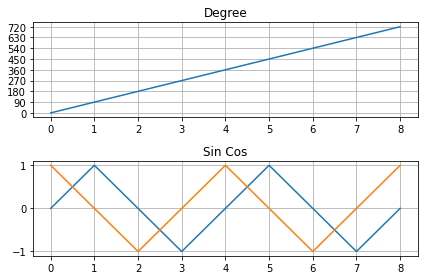

In [ ]:
plt.subplot(211)
plt.plot(X)
plt.yticks(X)
plt.title('Degree')
plt.grid()
plt.subplot(212)
plt.plot(X2)
plt.title('Sin Cos')
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
X.flatten()

array([  0,  90, 180, 270, 360, 450, 540, 630, 720])